In [178]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns
sns.set()

In [162]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
file = 'auto.csv'
df = pd.read_csv(file,names = headers)
pd.set_option("max_columns", None)
pd.set_option("max_rows", None)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [163]:
#dealing with missing values
#changing ? to nan with numpy
df.replace("?", np.nan, inplace = True)
#df.head(120)


In [164]:
#dealing with nans 
avg_normalized_losses = df['normalized-losses'].astype('float').mean(axis=0)
df['normalized-losses'].replace(np.nan, avg_normalized_losses, inplace=True)

#---------------------------------------------------------------------------------------
avg_bore = df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan,avg_bore,inplace = True)
#=--------------------------------------------------------------------------------------
avg_stroke = df['stroke'].astype('float').mean(axis=0)
df['stroke'].replace(np.nan,avg_stroke,inplace = True)
#---------------------------------------------------------------------------------------

avg_horsepower = df['horsepower'].astype('float').mean(axis= 0)
df['horsepower'].replace(np.nan,avg_horsepower,inplace=True)
#-----------------------------------------------------------------------------------------

avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan,avg_peakrpm,inplace=True)
#---------------------------------------------------------------------------------------------
max_numofdoors = df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan,max_numofdoors,inplace = True)
#-------------------------------------------------------------------------------------------
df.dropna(subset=["price"], axis=0, inplace=True)


In [165]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [166]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()


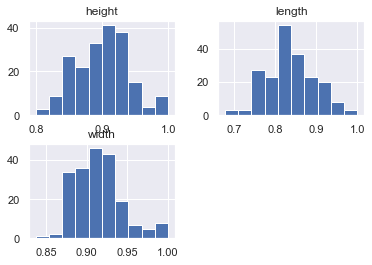

In [167]:
for_hist = df[['height','width','length']]
def hist(lst):
    lst.hist()
hist(for_hist)
    

In [168]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df.width

0      0.890278
1      0.890278
2      0.909722
3      0.919444
4      0.922222
5      0.920833
6      0.991667
7      0.991667
8      0.991667
10     0.900000
11     0.900000
12     0.900000
13     0.900000
14     0.929167
15     0.929167
16     0.943056
17     0.984722
18     0.837500
19     0.883333
20     0.883333
21     0.886111
22     0.886111
23     0.886111
24     0.886111
25     0.886111
26     0.886111
27     0.886111
28     0.897222
29     0.920833
30     0.887500
31     0.887500
32     0.888889
33     0.888889
34     0.888889
35     0.888889
36     0.887500
37     0.905556
38     0.905556
39     0.905556
40     0.868056
41     0.905556
42     0.916667
43     0.858333
46     0.905556
47     0.966667
48     0.966667
49     0.980556
50     0.891667
51     0.891667
52     0.891667
53     0.891667
54     0.891667
55     0.912500
56     0.912500
57     0.912500
58     0.912500
59     0.923611
60     0.923611
61     0.923611
62     0.923611
63     0.923611
64     0.923611
65     0

Text(0.5, 1.0, 'horsepower bins')

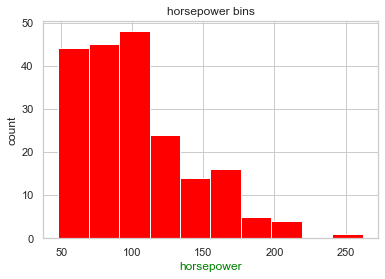

In [181]:
df["horsepower"]=df["horsepower"].astype(int, copy=True)
plt.pyplot.hist(df["horsepower"],color='red')


# set x/y labels and plot title
sns.set_style('whitegrid')
plt.pyplot.xlabel("horsepower",color = 'green')
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [190]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df['horsepower-binned']

0         Low
1         Low
2      Medium
3         Low
4         Low
5         Low
6         Low
7         Low
8      Medium
10        Low
11        Low
12     Medium
13     Medium
14     Medium
15     Medium
16     Medium
17     Medium
18        Low
19        Low
20        Low
21        Low
22        Low
23        Low
24        Low
25        Low
26        Low
27        Low
28        Low
29     Medium
30        Low
31        Low
32        Low
33        Low
34        Low
35        Low
36        Low
37        Low
38        Low
39        Low
40        Low
41        Low
42        Low
43        Low
46        Low
47     Medium
48     Medium
49       High
50        Low
51        Low
52        Low
53        Low
54        Low
55        Low
56        Low
57        Low
58     Medium
59        Low
60        Low
61        Low
62        Low
63        Low
64        Low
65     Medium
66        Low
67     Medium
68     Medium
69     Medium
70     Medium
71     Medium
72     Medium
73     Medium
74    

Text(0.5, 1.0, 'horsepower bins')

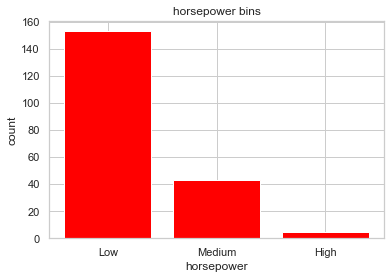

In [193]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts(),color = 'red')

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Graph for make: Total = 20


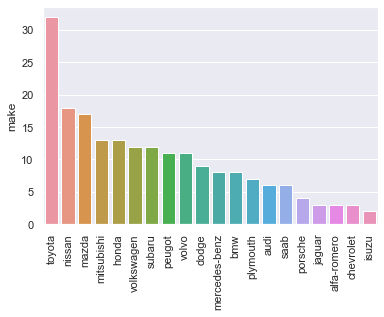

Graph for fuel-type: Total = 2


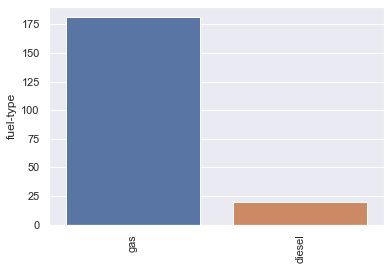

Graph for aspiration: Total = 2


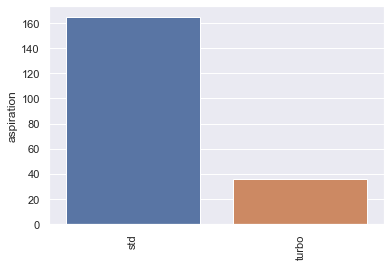

Graph for num-of-doors: Total = 2


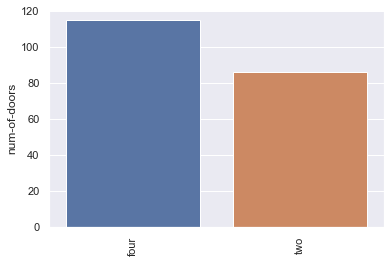

Graph for body-style: Total = 5


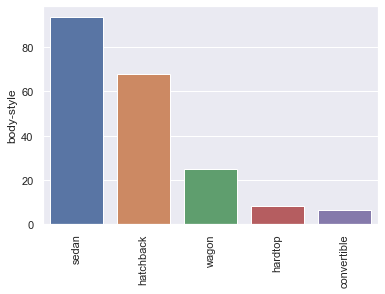

Graph for drive-wheels: Total = 3


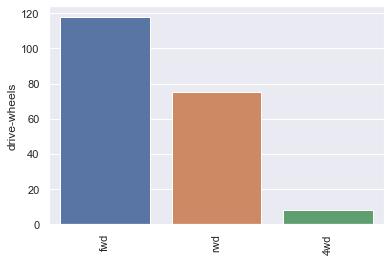

Graph for engine-location: Total = 2


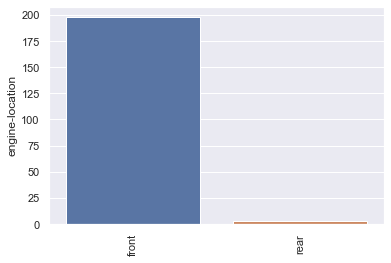

Graph for engine-type: Total = 6


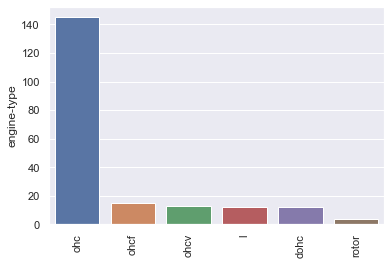

Graph for num-of-cylinders: Total = 7


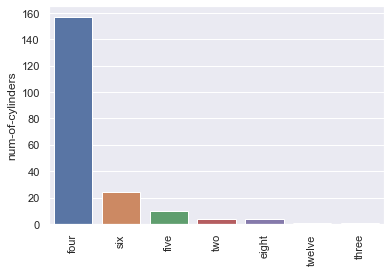

Graph for engine-size: Total = 20


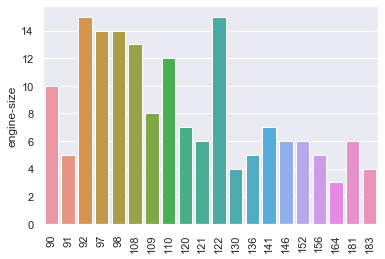

Graph for fuel-system: Total = 8


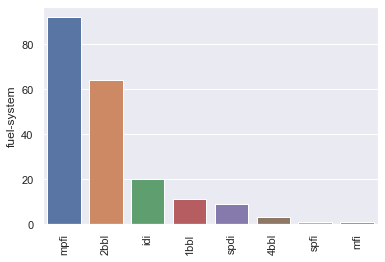

KeyError: 20.0

In [170]:
cat = df[["make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke"]]
for i in cat.columns:
    
    cat_num = cat[i].value_counts()
    if len(cat_num) > 20:
        cat_num = cat[i].value_counts()[:20]
    else:
        cat_num = cat[i].value_counts()        
    print(f'Graph for {i}: Total = {len(cat_num)}')
    chart = sns.barplot(x=cat_num.index,y =cat_num )
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [196]:
#dummy variables
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,Low


In [199]:
df['drive-wheels'].value_counts()
dummy_variable_1 = pd.get_dummies(df['drive-wheels'])
dummy_variable_1

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
10,0,0,1
